## Property Prices in San Francisco

* Determine variation in property prices by Supervisor District

* Any correlation between prices and police/fire/311 activity


In [2]:
# Dependencies and Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

pd.options.display.float_format = '{0:,.2f}'.format
pd.set_option('display.max_columns', 500)

# File to Load 
tax_data_to_load = "Resources/Assessor_Historical_Secured_Property_Tax_Rolls.csv"

# Read Secured Property Tax Rolls - Data is not very clean - Define all data type for faster processing

tax_data = pd.read_csv(tax_data_to_load,
 dtype={
 "Closed Roll Year" : object,
 "Property Location" : object,
 "Parcel Number" : object,
 "Block" : object,
 "Lot" : object,
 "Volume Number" : object,
 "Use Code" : object,
 "Use Definition" : object,
 "Property Class Code" : object,
 "Property Class Code Definition" : object,
 "Year Property Built" : object,
 "Number of Bathrooms" : object,
 "Number of Bedrooms" : object,
 "Number of Rooms" : object,
 "Number of Stories" : object,
 "Number of Units" : int,
 "Zoning Code" : object,
 "Construction Type" : object,
 "Lot Depth" : float,
 "Lot Frontage" : float,
 "Property Area" : float,
 "Basement Area" : float,
 "Lot Area" : float,
 "Lot Code" : object,
 "Tax Rate Area Code" : object,
 "Percent of Ownership" : float,
 "Exemption Code" : object,
 "Exemption Code Definition" : object,
 "Status Code" : object,
 "Misc Exemption Value" : object,
 "Homeowner Exemption Value" : float,
 "Current Sales Date" : object,
 "Assessed Fixtures Value" : float,
 "Assessed Improvement Value" : float,
 "Assessed Land Value" : float,
 "Assessed Personal Property Value" : float,
 "Assessor Neighborhood District" : object,
 "Assessor Neighborhood Code" : object,
 "Assessor Neighborhood" : object,
 "Supervisor District" : int,
 "Analysis Neighborhood" : object,
 "the_geom" : object,
 "Row ID" : object})


In [3]:
# Review the data

tax_data.head()

,Closed Roll Year,Property Location,Parcel Number,Block,Lot,Volume Number,Use Code,Use Definition,Property Class Code,Property Class Code Definition,Year Property Built,Number of Bathrooms,Number of Bedrooms,Number of Rooms,Number of Stories,Number of Units,Zoning Code,Construction Type,Lot Depth,Lot Frontage,Property Area,Basement Area,Lot Area,Lot Code,Tax Rate Area Code,Percent of Ownership,Exemption Code,Exemption Code Definition,Status Code,Misc Exemption Value,Homeowner Exemption Value,Current Sales Date,Assessed Fixtures Value,Assessed Improvement Value,Assessed Land Value,Assessed Personal Property Value,Assessor Neighborhood District,Assessor Neighborhood Code,Assessor Neighborhood,Supervisor District,Analysis Neighborhood,the_geom,Row ID
0,2007,0000 0200 BRANNAN ST0436,3774412,3774,412,25,SRES,Single Family Residential,Z,Condominium,2004,1.0,2,0,2,0,NaN,NaN,0.00,0.00,"1,820.00",0.00,0.00,NaN,1004,1.00,NaN,NaN,NaN,0,0.00,1950/11/04,0.00,"660,074.00","660,074.00",0.00,9,9H,South Beach,6,Financial District/South Beach,"(37.783600301443, -122.390711686202)",200701013774412
1,2016,0000 1207 INDIANA ST0004,4228041,4228,041,27,SRES,Single Family Residential,Z,Condominium,2000,2.0,2,5,2,1,NaN,NaN,0.00,0.00,"1,589.00",0.00,0.00,NaN,1000,0.50,11,Home Owners,NaN,0,"7,000.00",2013/12/20,0.00,"448,902.00","448,902.00",0.00,9,9E,Potrero Hill,10,Potrero Hill,"(37.75482032723, -122.390407823087)",201601014228041
2,2010,0000 0383 SITUS TO BE ASSIGNEDST0000,0041102,0041,102,1,COMR,Commercial Retail,C,Commercial Stores,NaN,3.0,0,0,2,5,NaN,NaN,0.00,0.00,"11,507.00",0.00,0.00,NaN,1000,0.70,NaN,NaN,NaN,0,0.00,NaN,0.00,"643,682.00","1,396,687.00",0.00,8,8D,North Beach,3,North Beach,"(37.805391366593, -122.413327689424)",201001010041102
3,2007,0000 0708 NORTH POINT STT 1,0024038,0024,038,1,SRES,Single Family Residential,Z,Condominium,2000,2.0,3,5,1,1,NaN,NaN,0.00,0.00,"1,150.00",0.00,0.00,NaN,1000,1.00,NaN,NaN,NaN,0,0.00,NaN,0.00,"365,523.00","365,523.00",0.00,8,8E,Russian Hill,2,Russian Hill,"(37.806098058572, -122.419076819471)",200701010024038
4,2016,0000 0188 MARY TERESA ST0000,5054A152,5054A,152,30,SRES,Single Family Residential,D,Dwelling,2008,2.0,2,0,0,0,NaN,NaN,0.00,0.00,"1,360.00",0.00,0.00,NaN,1000,1.00,11,Home Owners,NaN,0,"7,000.00",2014/11/21,0.00,"255,843.00","383,764.00",0.00,10,10K,Bayview Heights,10,Bayview Hunters Point,"(37.713888461234, -122.399170485325)",201601015054A152


In [4]:
# Calculate total tax value - sort by Close Roll Year

tax_data = tax_data.loc[(tax_data["Closed Roll Year"] >= "2006") & (tax_data["Closed Roll Year"] <= "2017")]
tax_data["Total Value"] =  tax_data["Assessed Land Value"] + tax_data["Assessed Improvement Value"] + tax_data["Assessed Fixtures Value"] + tax_data["Assessed Personal Property Value"]
tax_data["Sale Year"] = tax_data["Current Sales Date"].str[:4]
tax_data.sort_values(by=["Closed Roll Year"], inplace=True)

tax_data.head()                                                                                                                                               

,Closed Roll Year,Property Location,Parcel Number,Block,Lot,Volume Number,Use Code,Use Definition,Property Class Code,Property Class Code Definition,Year Property Built,Number of Bathrooms,Number of Bedrooms,Number of Rooms,Number of Stories,Number of Units,Zoning Code,Construction Type,Lot Depth,Lot Frontage,Property Area,Basement Area,Lot Area,Lot Code,Tax Rate Area Code,Percent of Ownership,Exemption Code,Exemption Code Definition,Status Code,Misc Exemption Value,Homeowner Exemption Value,Current Sales Date,Assessed Fixtures Value,Assessed Improvement Value,Assessed Land Value,Assessed Personal Property Value,Assessor Neighborhood District,Assessor Neighborhood Code,Assessor Neighborhood,Supervisor District,Analysis Neighborhood,the_geom,Row ID,Total Value,Sale Year
0,2007,0000 0200 BRANNAN ST0436,3774412,3774,412,25,SRES,Single Family Residential,Z,Condominium,2004,1.0,2,0,2,0,NaN,NaN,0.00,0.00,"1,820.00",0.00,0.00,NaN,1004,1.00,NaN,NaN,NaN,0,0.00,1950/11/04,0.00,"660,074.00","660,074.00",0.00,9,9H,South Beach,6,Financial District/South Beach,"(37.783600301443, -122.390711686202)",200701013774412,"1,320,148.00",1950
1247437,2007,0000 4566 18TH ST0000,2657012,2657,012,19,SRES,Single Family Residential,D,Dwelling,1950,1.0,0,3,1,1,RH2,D,0.00,0.00,0.00,0.00,932.00,NaN,1000,1.00,NaN,NaN,NaN,0,0.00,NaN,0.00,"26,734.00","27,069.00",0.00,5,5G,Corona Heights,8,Castro/Upper Market,"(37.760683710864, -122.440392147812)",200701012657012,"53,803.00",NaN
1247436,2007,0000 0719 GATES ST0000,5814033,5814,033,34,SRES,Single Family Residential,D,Dwelling,1946,2.0,3,5,1,1,RH1,D,70.00,0.00,"1,148.00",0.00,"1,750.00",R,1000,0.50,11,Home Owners,NaN,0,"7,000.00",NaN,0.00,"108,230.00","54,106.00",0.00,9,9G,Yerba Buena,9,Bernal Heights,"(37.734365345444, -122.41415834188)",200701015814033,"162,336.00",NaN
281810,2007,0000 2655 HYDE ST0303,0026T349B,0026T,349B,1,COMM,Commercial Misc,TS,Timeshare,NaN,0.0,0,0,0,0,NaN,NaN,0.00,0.00,0.00,0.00,0.00,NaN,1000,1.00,NaN,NaN,NaN,0,0.00,NaN,0.00,"6,040.00","4,025.00",0.00,8,8E,Russian Hill,2,Russian Hill,"(37.805473429601, -122.420596543189)",200701010026T349B,"10,065.00",NaN
281811,2007,0000 0235 BERRY ST 0105,8708115,8708,115,44,SRES,Single Family Residential,Z,Condominium,2007,0.0,2,0,0,0,NaN,NaN,0.00,0.00,"1,255.00",0.00,0.00,NaN,1013,0.50,NaN,NaN,NaN,0,0.00,NaN,0.00,"879,989.00","125,383.00",0.00,9,9D,Mission Bay,6,Mission Bay,"(37.774703061052, -122.394089394731)",200701018708115,"1,005,372.00",NaN


In [5]:
supervisor_districts = {
1  : "1-Richmond, Golden Gate Park",
2  : "2-Marina, Pacific Heights",
3  : "3-North Beach, Chinatown, Financial District",
4  : "4-Sunset",
5  : "5-Haight, Fillmore, Hayes Valley",
6  : "6-Union Square, Tenderloin, Civic Center, SOMA",
7  : "7-West Portal, St. Francis Wood, Stonestown",
8  : "8-The Castro, Noe Valley, Twin Peaks",
9  : "9-Mission District, Bernal Heights",
10 : "10-Potrero Hill, Bayview-Hunters Point",
11 : "11-Excelsior,  Ingleside, Outer Mission",
}

In [6]:
# Analyze data - Get all possible values for Use Definition
tax_data["Use Definition"].unique()

array(['Single Family Residential', 'Commercial Misc',
       'Commercial Retail', 'Miscellaneous/Mixed-Use',
       'Multi-Family Residential', 'Commercial Office', 'Government',
       'Commercial Hotel', 'Industrial', nan], dtype=object)

In [7]:
# Analyze data - Get all possible values for Percent of Ownership
tax_data["Percent of Ownership"].unique()

array([1.000e+00, 5.000e-01, 4.800e-01, ..., 5.161e-01, 6.000e-05,
       4.000e-05])

In [8]:
# Analyze data - Get all possible values for Property Class Code Definition
tax_data['Property Class Code Definition'].unique()

array(['Condominium', 'Dwelling', 'Timeshare', 'Commercial Store Condo',
       'Live/Work Condominium', 'Vacant Lot', 'Commercial Stores',
       'Apartment', 'Flats & Duplex', 'Bank', 'Coop Units Unsegregated',
       'Coop Units Segregated', 'Misc', 'Office',
       'Public Buildings (Govt)', 'Parking Lot', 'Mission Bay',
       'Flat & Store', 'Hotels - Other', 'Office - Condominium',
       'Apartmnt & Commercial Store', 'Industrial', 'Condominium BMR',
       'Schools', 'Churches,Convents,Rectories', 'Hotel',
       'Dwellings - Apartments', 'Garages (Commercial)', 'City Property',
       'Town House', 'Time Share Unsegregated', 'Dwelling BMR',
       '2 Dwellings on One Parcel', 'PUD (Planned Unit Development)',
       'Garage Condominium', 'Convalescent/Nursing Homes', 'Motels',
       'Office and Apartments', 'Gas Station', 'TI Apartment',
       'Hospitals', 'Theatres', 'Industial Warehouse',
       'Parking Stall Condominium', '1 Flat & 1 Apt Bldg-1 Parcel',
       'TI Flats

In [9]:
# There are many property types. Determine those that make the bulk of the data. 
# Calculate total parcels in a particular year
parcels = tax_data.loc[(tax_data["Closed Roll Year"] == "2017")  
                              & (tax_data["Percent of Ownership"]== 1)
                              ]

# Group parcels by Property Class
property_types=parcels.groupby(["Property Class Code Definition"]).agg(
    {"Parcel Number" : "count"
    })
# Calculate percentages for each Property Class
property_types["Percent Total"] = property_types["Parcel Number"]/len(parcels)
property_types.sort_values(by=["Percent Total"], inplace=True, ascending=False)

# Review results
property_types.head(10)

,Parcel Number,Percent Total
Property Class Code Definition,,
Dwelling,74449,0.46
Condominium,37787,0.23
Flats & Duplex,12191,0.08
Timeshare,4239,0.03
Apartment 5 to 14 Units,3971,0.02
Apartment,3103,0.02
Apartment 15 Units or more,3052,0.02
Live/Work Condominium,2632,0.02
Commercial Stores,2072,0.01


In [10]:
# Create two empty dataframe

df_values=pd.DataFrame()
df_sales=pd.DataFrame()

for year in range (2006,2017) :

    values_last = tax_data.loc[(tax_data["Closed Roll Year"] == str(year)) 
                               & (tax_data["Percent of Ownership"]== 1)
                               & (tax_data['Property Class Code Definition'].isin(["Dwelling","Condominium","Live/Work Condominium"]))
                          ]                         
    values_last = values_last[["Parcel Number","Total Value","Supervisor District"]]
    values_last.rename(columns={"Total Value": "Total Value Last","Supervisor District": "District Last"}, inplace=True)
    
    values_next = tax_data.loc[(tax_data["Closed Roll Year"] == str(year+1)) 
                               & (tax_data["Percent of Ownership"]== 1)
                               & (tax_data['Property Class Code Definition'].isin(["Dwelling","Condominium","Live/Work Condominium"]))
                          ]
    values_next = values_next[["Parcel Number","Total Value","Supervisor District","the_geom"]]
    values_next.rename(columns={"Total Value": "Total Value Next"}, inplace=True)

    df = pd.merge(values_last, values_next, how="inner", on=["Parcel Number", "Parcel Number"])

    # Get only the properties where the value increased by more than 3%  
    
    df_sale = df.loc[(df["Total Value Next"]>df["Total Value Last"]*1.03)]

    df_district=df_sale.groupby(["Supervisor District"]).agg(
       {"Total Value Next" : "mean",
        "Parcel Number" : "count"
       })
    df_district.sort_values(by=["Supervisor District"], inplace=True)
  
    
    if year > 2006:
        df_values[str(year+1)] = df_district["Total Value Next"]
        df_sales[str(year+1)] = df_district["Parcel Number"]


In [26]:
# Get properties sold for over 10M in the last year

df_luxury_sale = df_sale.loc[(df_sale["Total Value Next"] >= 3000000)]
df_luxury_sale.head()
print ("Total luxury properties "+str(len(df_luxury_sale)))

# Function to parse the coordinates into a tuple 
def to_gis (x):
    xx = x.replace("(","")
    xx = xx.replace(")","")
    xx = xx.replace(" ","")
    yy = xx.split(",")
    yy[0] = float(yy[0])
    yy[1] = float(yy[1])
    return tuple(yy)

# Put coordinates of these properties into a list (a list of tuples)
property_list = []
for i in range(len(df_luxury_sale)):
    property_list.append(to_gis(df_luxury_sale.iloc[i]["the_geom"]))


Total luxury properties 385


In [12]:
# Review average sale prices for residential properties by year

df_values_district = df_values.T
df_values_district.head(15)

Supervisor District,1,2,3,4,5,6,7,8,9,10,11
2008,"909,472.35","2,184,189.78","1,032,748.46","736,869.79","712,658.08","731,190.90","919,925.23","951,413.48","686,199.88","636,462.35","654,025.51"
2009,"889,380.30","1,940,518.32","1,021,560.41","685,102.72","846,112.91","822,142.52","957,514.86","1,034,662.06","654,817.11","577,867.28","585,839.03"
2010,"820,896.45","1,905,019.88","956,245.73","699,911.31","734,074.36","833,025.87","864,620.97","887,802.68","694,473.69","563,517.16","582,196.98"
2011,"922,798.04","2,016,543.13","889,809.03","717,509.04","758,565.92","717,290.07","962,563.30","973,760.30","678,053.99","502,554.60","588,491.23"
2012,"927,580.65","2,201,123.59","1,047,825.48","710,610.76","851,709.77","881,171.99","933,200.78","1,034,283.50","704,596.11","629,162.99","597,611.12"
2013,"954,039.35","2,070,423.51","1,054,808.89","736,954.05","833,269.94","862,862.87","872,898.55","1,087,237.15","712,123.62","548,388.80","562,853.95"
2014,"1,000,066.06","2,042,605.74","1,169,568.88","817,904.14","907,284.87","917,158.90","966,746.65","1,166,804.04","810,367.78","620,848.85","639,080.52"
2015,"1,142,748.35","2,377,624.35","1,261,010.44","897,292.74","1,038,965.75","1,056,912.37","1,072,910.98","1,253,926.78","909,063.97","732,437.87","704,422.10"
2016,"1,153,580.99","2,709,006.41","1,401,240.83","895,276.80","1,116,184.26","1,362,184.08","1,152,419.02","1,459,506.60","985,388.39","856,658.08","755,713.02"
2017,"1,245,090.29","2,780,629.16","1,531,287.57","979,293.74","1,141,203.97","1,238,656.06","1,278,350.25","1,484,612.87","1,129,858.72","787,581.50","796,895.19"


In [13]:
df_2008 = df_values_district.iloc[0,:]
df_2017 = df_values_district.iloc[9,:]
df_2017

df_increase = pd.merge(df_2008, df_2017,  on=["Supervisor District"])
df_increase.head()
df_increase["Percent"]= df_increase["2017"]/df_increase["2008"]
df_increase.sort_values(by=["Percent"], inplace = True, ascending = False)
df_increase.head(11)

,2008,2017,Percent
Supervisor District,,,
6,"731,190.90","1,238,656.06",1.69
9,"686,199.88","1,129,858.72",1.65
5,"712,658.08","1,141,203.97",1.60
8,"951,413.48","1,484,612.87",1.56
3,"1,032,748.46","1,531,287.57",1.48
7,"919,925.23","1,278,350.25",1.39
1,"909,472.35","1,245,090.29",1.37
4,"736,869.79","979,293.74",1.33
2,"2,184,189.78","2,780,629.16",1.27


In [14]:
# Review total sales for residential properties by year

df_sales_district = df_sales.T
df_sales_district.head(15)

Supervisor District,1,2,3,4,5,6,7,8,9,10,11
2008,265,669,335,487,622,1690,724,822,449,505,367
2009,255,538,277,344,373,1647,435,533,256,339,170
2010,307,459,283,463,297,1466,500,548,480,449,526
2011,294,592,278,446,455,1068,480,682,583,894,447
2012,365,860,356,749,652,1887,834,917,702,1082,627
2013,428,1038,518,942,725,2796,1088,980,717,1318,978
2014,582,1091,563,1325,841,2752,1433,1246,864,1357,1387
2015,472,834,485,759,617,1316,1050,1138,699,1033,814
2016,410,787,435,516,580,887,1036,1007,757,792,735
2017,365,802,246,539,569,626,855,932,446,676,411


In [15]:
# Determine new construction projects by year and Supervisor District
new_construction=tax_data.loc[(tax_data["Year Property Built"] >= "2007") & 
                              (tax_data["Year Property Built"] <= "2017") &
                              (tax_data['Property Class Code Definition'].isin(["Dwelling","Condominium","Live/Work Condominium"]))
                             ].groupby(["Year Property Built","Supervisor District"]).agg(
    {"Parcel Number" : "count",
    })
new_construction.sort_values(by=["Year Property Built","Supervisor District"], inplace=True)

# Pivot new construction dataset by Supervisor District
new_construction_district = new_construction.pivot_table("Parcel Number",index="Year Property Built", columns=["Supervisor District"] )
new_construction_district.head(50)


Supervisor District,1,2,3,4,5,6,7,8,9,10,11
Year Property Built,,,,,,,,,,,
2007,138.00,225.00,"1,670.00",30.00,"2,192.00","6,092.00",57.00,284.00,932.00,"3,676.00",56.00
2008,229.00,457.00,185.00,147.00,"1,522.00","13,232.00",62.00,590.00,214.00,471.00,142.00
2009,73.00,220.00,432.00,38.00,491.00,"6,634.00",90.00,259.00,671.00,"1,668.00",77.00
2010,34.00,97.00,256.00,nan,374.00,"1,351.00",84.00,252.00,111.00,857.00,53.00
2011,25.00,10.00,nan,8.00,5.00,127.00,6.00,140.00,85.00,199.00,11.00
2012,10.00,189.00,20.00,nan,129.00,"2,034.00",57.00,169.00,176.00,143.00,36.00
2013,42.00,48.00,15.00,nan,100.00,135.00,25.00,118.00,84.00,243.00,22.00
2014,20.00,137.00,500.00,nan,399.00,73.00,23.00,535.00,647.00,144.00,15.00
2015,9.00,14.00,4.00,5.00,68.00,187.00,44.00,129.00,109.00,122.00,nan


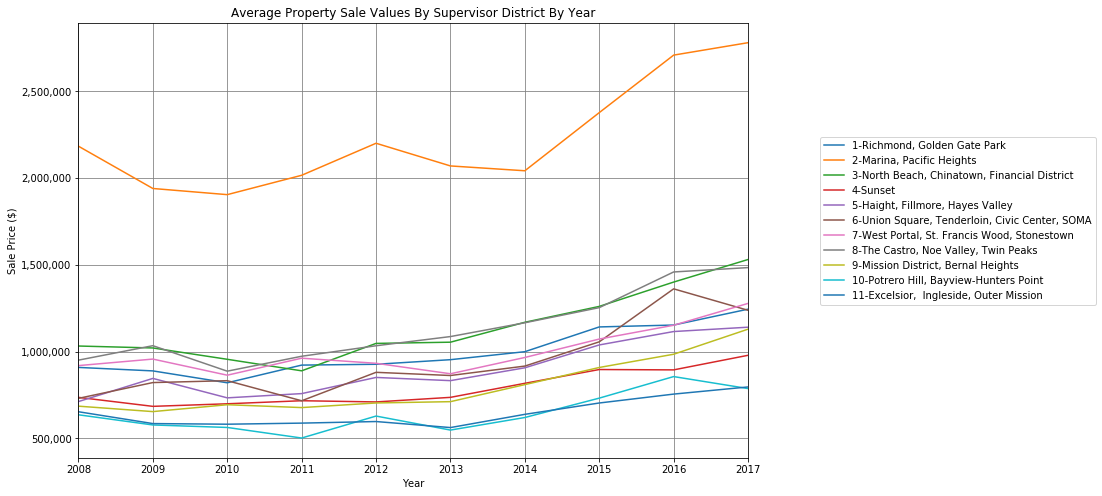

In [16]:
# Plot average property sales by district

def major_formatter(x, pos):
    return "[%.2f]" % x

ax = df_values_district.plot(figsize=(12,8), legend = False)
plt.legend(list(supervisor_districts.values()),  bbox_to_anchor=(1.1, 0.75))

# Complete formatting the plot 
plt.title('Average Property Sale Values By Supervisor District By Year')
plt.xlabel("Year")
plt.ylabel("Sale Price ($)")
plt.grid(linestyle='-', color = 'gray')

ax.get_yaxis().set_major_formatter(
   plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

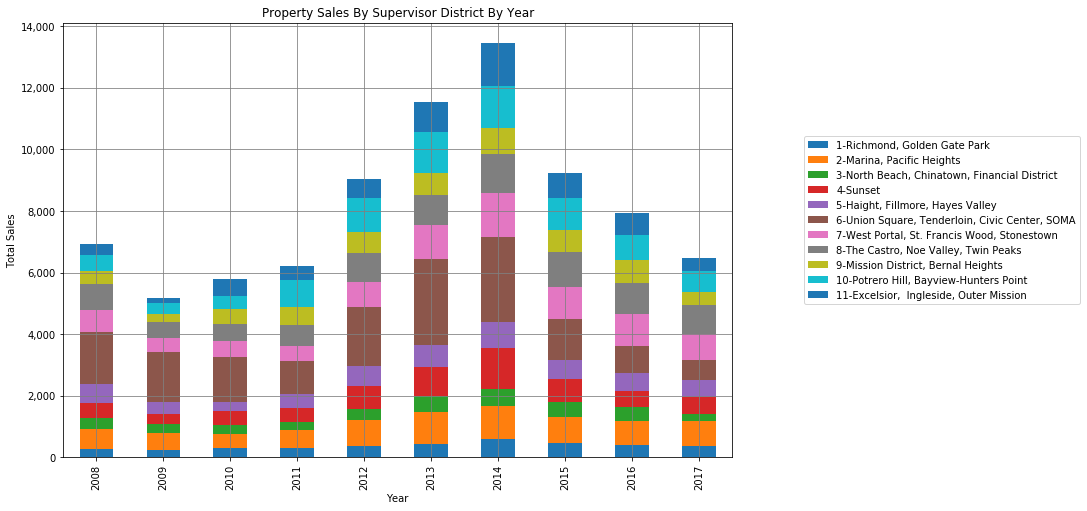

In [22]:
# Plot property total sales by district

ax = df_sales_district.plot.bar(stacked=True, figsize=(12,8), legend = False)
plt.legend(list(supervisor_districts.values()),  bbox_to_anchor=(1.1, 0.75))

# Complete formatting the plot 
plt.title('Property Sales By Supervisor District By Year')
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(linestyle='-', color = 'gray')

ax.get_yaxis().set_major_formatter(
   plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

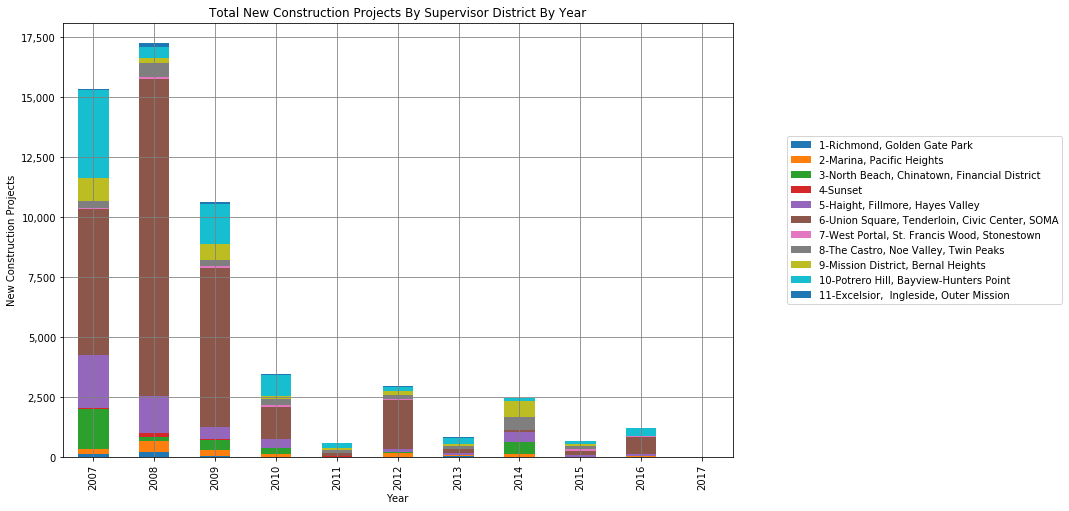

In [25]:
# Plot new construction projects by district

#ax = new_construction_district.plot(figsize=(12,8), legend = False)
ax = new_construction_district.plot.bar(stacked=True, figsize=(12,8), legend = False)
plt.legend(list(supervisor_districts.values()),  bbox_to_anchor=(1.5, 0.75))

# Complete formatting the plot 
plt.title('Total New Construction Projects By Supervisor District By Year')
plt.xlabel("Year")
plt.ylabel("New Construction Projects")
plt.grid(linestyle='-', color = 'gray')

ax.get_yaxis().set_major_formatter(
   plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

In [19]:
# Set up the Google Maps API Call
import requests
import json

# Google developer API key
from config import gkey
import gmaps

In [27]:
gmaps.configure(api_key=gkey)

# Customize the size of the figure
figure_layout = {
    'width': '800px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)


In [28]:
# Heatmap of Property Values
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(property_list))
fig

Figure(layout=FigureLayout(height='420px'))